# I. Introduction
## 1. Domain-specific area
The Chosen domain-specific area would be the real-estate industry, currently housing price appraisal and prediction is done manually by real-estate agents basing off on various factors, such as location, lot area, proximity to features and so on. And also by comparing to other similar and recently-sold properties in the market.

As regression in machine-learning is about investigating the relationship between independent variables/features and a dependent variable/outcome, this regression model would come in handy for real-estate agents or house buyer/sellers to help predict the right price for their properties, based off the various factors as stated above.

## 2. Dataset
The Dataset chosen for this project is the Melbourne Housing Market, the data for which was obtained via web-scraping results from domain.com.au, which is an australian real-estate house listing website. 
The dataset is 2MB in size and is stored in a .csv format. 
It contains various factors such as the Address, Type of Real estate, Suburb, Method of Selling, (Number of) Rooms, Price (In Australian Dollars), Real Estate Agent, Date of Sale and distance from C.B.D.
The dataset can be accessed via the official Kaggle Website.

What each factor in the dataset means:

Suburb: Suburb Name

Address: Address

Rooms: Number of bedrooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type of house:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

## 3. Objectives of the project
The objectives of the project would be to develop a machine learning regression model that can accurately predict the house price based off various factors such as location, facilities, size and so on.

If we manage to do so, it would greatly speed up the current process of appraising a house price which currently is done manually by real-estate agents, allowing for faster transcations in the real-estate market, benefiting everyone involved as the time that a property sits unused waiting to be sold is reduced.

# II. Implementation


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import norm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## 4. Loading the Dataset and Preprocessing

In [2]:
#Loading the Dataset
df = pd.read_csv("Melbourne_housing_FULL.csv")
#The Dataset is stored as a CSV file
#Print the first 10 rows of the dataset
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


### Categorical Variables
Firstly, the following variables: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname' will need to be specified as categories rather than general objects, so as to prevent them from skewing the data analysis



In [3]:
#View Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
# Identify object columns
print(df.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [5]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    df[colname] = df[colname].astype('category')

In addition, the Date variable will need to be converted to a date object.

In [6]:
#Convert date to date object
df['Date'] = pd.to_datetime(df['Date'])

We can also streamline down the dataset by breaking down the address feature into just the streetname, as we do not need to know the exact house number of the house.

In [7]:
#Print dataset address column
df['Address']

0             68 Studley St
1              85 Turner St
2           25 Bloomburg St
3        18/659 Victoria St
4              5 Charles St
                ...        
34852           13 Burns St
34853         29A Murray St
34854        147A Severn St
34855      12/37 Stephen St
34856      3 Tarrengower St
Name: Address, Length: 34857, dtype: category
Categories (34009, object): ['1 Abercrombie St', '1 Aberfeldie Wy', '1 Acacia St', '1 Acheron Av', ..., '9b Bewdley St', '9b Latham St', '9b Marquis Rd', '9b Stewart St']

In [8]:
# new data frame with split value columns 
new = df["Address"].str.split(" ", n = 1, expand = True) 
new

,0,1
0,68,Studley St
1,85,Turner St
2,25,Bloomburg St
3,18/659,Victoria St
4,5,Charles St
...,...,...
34852,13,Burns St
34853,29A,Murray St
34854,147A,Severn St
34855,12/37,Stephen St


In [9]:
# making separate first name column from new data frame 
df["HouseNum"]= new[0] 
  
# making separate last name column from new data frame 
df["StreetName"]= new[1] 

In [10]:
# Dropping old Name columns 
df.drop(columns =["Address",'HouseNum'], inplace = True) 
  
# Updated df display 
df 

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,StreetName
0,Abbotsford,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Studley St
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,Turner St
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,Bloomburg St
3,Abbotsford,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,Victoria St
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,Charles St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,4.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,Burns St
34853,Yarraville,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,Murray St
34854,Yarraville,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,2.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,Severn St
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,NaN,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,Stephen St


### Numeric Variables
Secondly, the Postcode variable is being treated as numeric when it should've been identified as categorical. It will need to be converted to the correct datatype

In [11]:
# Convert numeric variables to categorical
num_cats = ['Postcode']  

#For loop to convert all variables in the 'postcode' column to category datatype
for colname in num_cats:
    df[colname] = df[colname].astype('category')   

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Rooms          34857 non-null  int64         
 2   Type           34857 non-null  category      
 3   Price          27247 non-null  float64       
 4   Method         34857 non-null  category      
 5   SellerG        34857 non-null  category      
 6   Date           34857 non-null  datetime64[ns]
 7   Distance       34856 non-null  float64       
 8   Postcode       34856 non-null  category      
 9   Bedroom2       26640 non-null  float64       
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

### Duplicate Variables
Thirdly, according to the dataset documentation, both the 'Rooms' and 'Bedroom2' variables contain information on the number of bedrooms a house has, but from different sources.

In [12]:
# Compare Rooms v Bedroom2
df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,StreetName,Rooms v Bedroom2
0,Abbotsford,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,...,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Studley St,0.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,...,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,Turner St,0.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,...,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,Bloomburg St,0.0
3,Abbotsford,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,...,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,Victoria St,0.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,...,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,Charles St,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,4.0,...,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,Burns St,0.0
34853,Yarraville,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,...,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,Murray St,0.0
34854,Yarraville,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,2.0,...,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,Severn St,0.0
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,NaN,...,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,Stephen St,NaN


The differences between the two variables appear to be minimal, thus keeping both would just be duplicating information, thus the Bedroom2 feature will be removed from the dataset to trim down the dataset.

In [13]:
# Drop columns
df = df.drop(['Bedroom2','Rooms v Bedroom2'],1)

### Feature Engineering

The dataset contains the variable of the year that the home was built. Although it is currently being measured by the specific date, what it really represents is the age of the home. As such, home age can be expressed in terms of historic (greater than 50 years old) vs non-historic (less than 50 years old) to get the heart of this information in a more condensed way, allowing for better analysis and visualization.

In [14]:
# Add age feature
df['Age'] = 2017 - df['YearBuilt']

# Identify historic homes
df['Historic'] = np.where(df['Age']>=50,'Historic','Contemporary')

# Code to convert the new feature to category datatype
df['Historic'] = df['Historic'].astype('category')

We can also create a new feature called location by combining Suburb and StreetName. The house in the same street and same suburb should have some similarities in prices as they should be in the same location

In [15]:
#Code to combine the Suburb and StreetName features into a single Location feature
df['Location']= df["Suburb"].astype(str) +", "+ df["StreetName"] 

In [16]:
#Code to convert the new feature to category datatype
df['Location'] = df['Location'].astype('category')

### Missing Data

Last but not least, is checking for missing values or entries in the dataset, the presence of which can skew the results of the analysis and subsequent machine learning algorithm.

In [17]:
##Checking for NULL values
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
StreetName           0
Age              19306
Historic             0
Location             0
dtype: int64

In [18]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
StreetName        0.000000
Age              55.386293
Historic          0.000000
Location          0.000000
dtype: float64

In [19]:
#Drop NULL Values
df = df.dropna()

In [20]:
#Confirm that missing/null values were removed
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
StreetName       0
Age              0
Historic         0
Location         0
dtype: int64

A dataset is said to be in First Normal form(1NF) only if:

1. There are only Single Valued Attributes.
2. Attribute Domain does not change.
3. There is a unique name for every Attribute/Column.
4. The order in which data is stored does not matter. 

Our dataset is indeed in 1NF as every row contains a single value, their values do not change, each column has it's own unique name, and the order in which the data is stored does not matter.

## 5. Identify the key series of the dataset and provide a statistical summary of the data.

The Key dependent variable series and what we're trying to predict and is affected by various factors would be the price column, hence we will attempt to visualize the impact these factors have on the price down below.

Measures of central tendency would be: The Mode, Median and Mean

Measures of spread would be: Standard Deviation, Range between min and max, the Quartiles(25%,50%,75%).

In [21]:
#Print out the various features of the dataset
df.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137,51.246652
std,0.963786,6.793819e+05,6.813402,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364,37.040876
min,1.000000,1.310000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000,-2.000000
25%,2.000000,6.410000e+05,6.400000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000,17.000000
50%,3.000000,9.000000e+05,10.200000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000,47.000000
75%,4.000000,1.345000e+06,13.900000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000,72.000000
max,12.000000,9.000000e+06,47.400000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000,821.000000


### Measures of Central Tendency

In [22]:
#Print out the median of features of the dataset
df.median()

Rooms                 3.0000
Price            900000.0000
Distance             10.2000
Bathroom              2.0000
Car                   2.0000
Landsize            478.0000
BuildingArea        132.0000
YearBuilt          1970.0000
Lattitude           -37.7987
Longtitude          144.9985
Propertycount      6567.0000
Age                  47.0000
dtype: float64

In [23]:
#Print out the mean of features of the dataset
df.mean()

Rooms            3.098909e+00
Price            1.092902e+06
Distance         1.119989e+01
Bathroom         1.646450e+00
Car              1.692247e+00
Landsize         5.234804e+02
BuildingArea     1.493095e+02
YearBuilt        1.965753e+03
Lattitude       -3.780450e+01
Longtitude       1.449914e+02
Propertycount    7.475940e+03
Age              5.124665e+01
dtype: float64

### Measures of Spread

In [24]:
#Print out the measure of spread(Standard Deviation) of the dataset
df.std()

Rooms                               0.963786
Price                          679381.904112
Date             226 days 11:46:05.254984868
Distance                            6.813402
Bathroom                            0.721611
Car                                 0.975464
Landsize                         1061.324228
BuildingArea                        87.92558
YearBuilt                          37.040876
Lattitude                           0.090549
Longtitude                          0.118919
Propertycount                    4375.024364
Age                                37.040876
dtype: object

### Distribution 
The distribution of the dependent variable that we are trying to predict is Price. This variable appears to be normally distributed and skewed towards the right.

<AxesSubplot:xlabel='Price'>

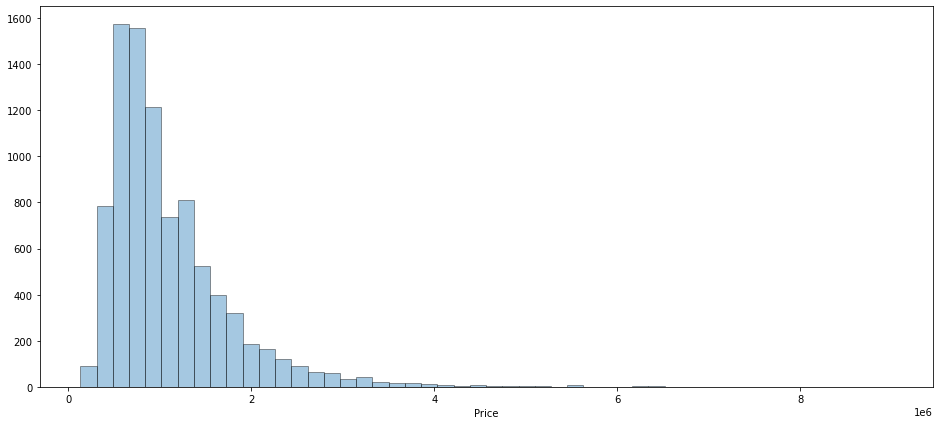

In [25]:
plt.figure(figsize=(16,7))
sns.distplot(df['Price'], kde = False,hist_kws=dict(edgecolor="k"))

In [26]:
#Calculate Skewedness of dependent variable
df['Price'].skew()

2.4113965483321715

In [27]:
#Calculate Kurtosis of Dataset
df.kurtosis()

Rooms              1.380903
Price             11.043566
Distance           3.619309
Bathroom           3.665298
Car                5.298883
Landsize         746.334388
BuildingArea     159.715510
YearBuilt         20.176353
Lattitude          1.489402
Longtitude         1.565454
Propertycount      0.896395
Age               20.176353
dtype: float64

## 6. Data Visualization

### Categoric Features Visualization 

In [28]:
# Identify categorical features
df.select_dtypes(['category']).columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea',
       'Regionname', 'Historic', 'Location'],
      dtype='object')

In [29]:
# Abbreviate Regionname categories
df['Regionname'] = df['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

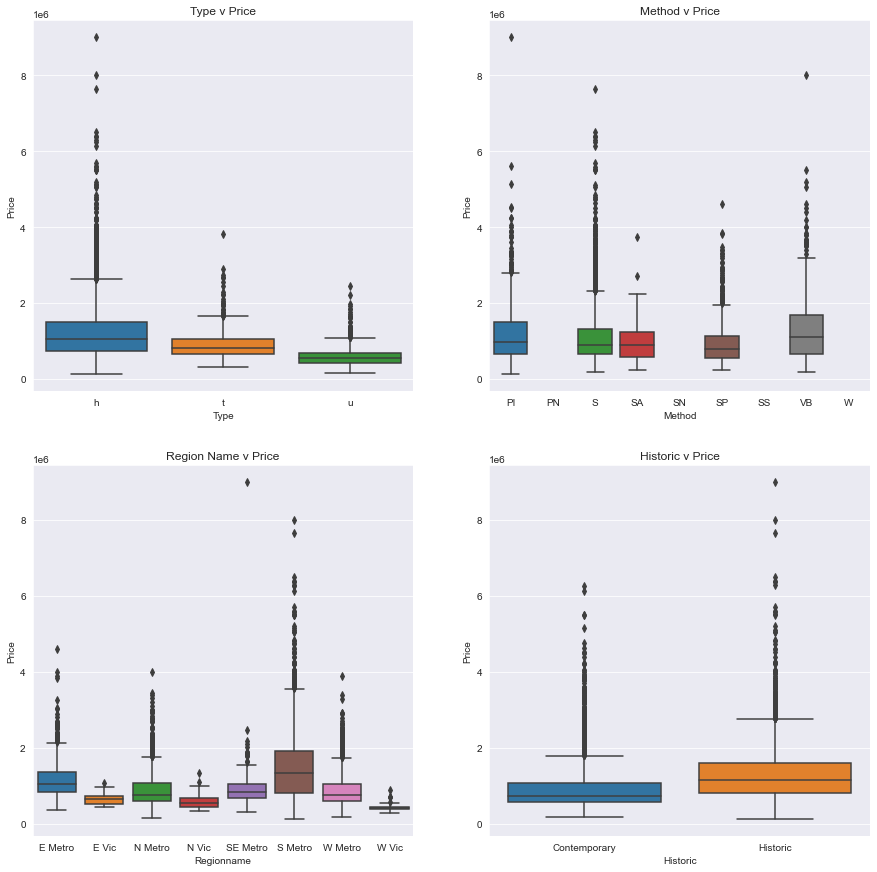

In [30]:
# Subplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'Price', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

### Data Insights

-From our data visualization, we can see that the type of house does have an impact on the sale price, with houses generally selling for the most followed by townhouses and finally units.

-Prices tend to generally stay around the same regardless of sales method

-Metropolitan regions tend to sell for much more than their Victoria counterparts, with the Southern Metro area selling for the greatest amounts (More than 1.5 Million AUD average price)

-Historic homes also tend to sell for more compared to their contempoary counterparts, by some half a million AUD more.

### Numeric Features Visualization

In [31]:
# Identify numeric features
df.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

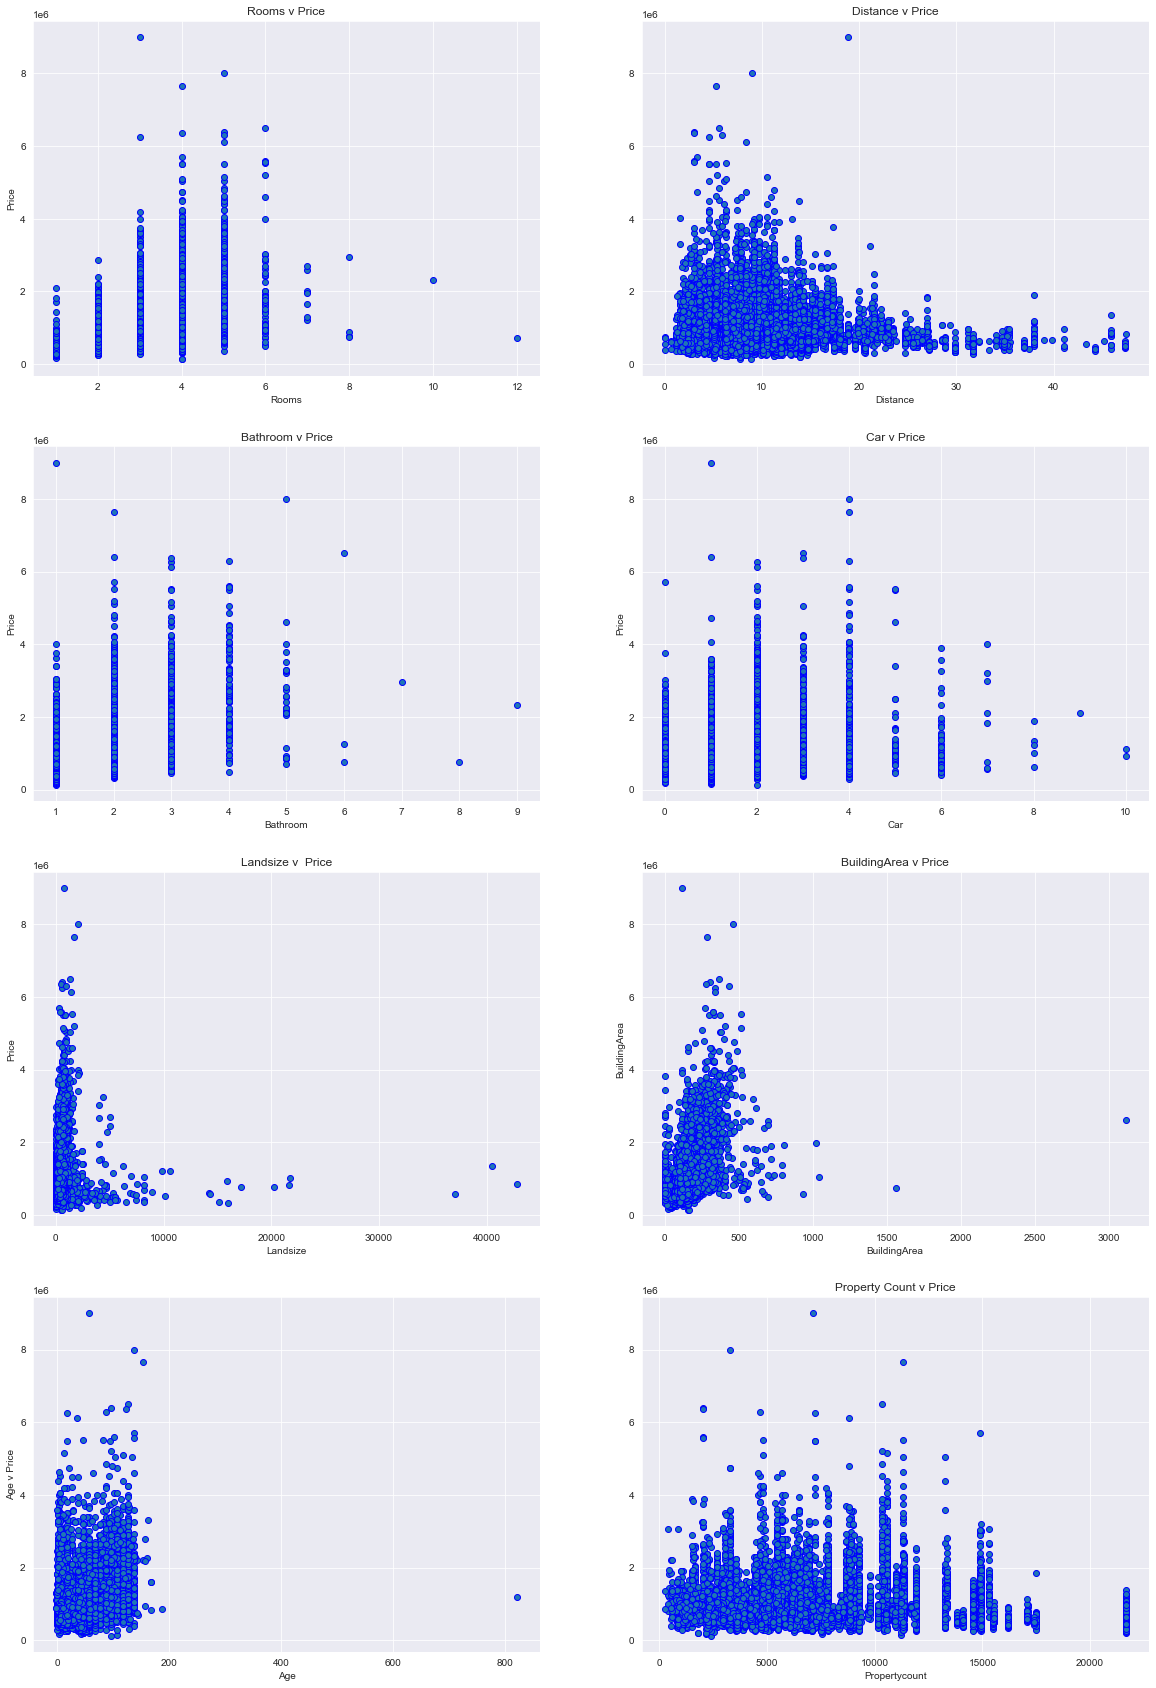

In [32]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = df, edgecolor = 'b')
axes[1,1].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = df, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = df, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

In [33]:
df['AreaPerRoom'] = df['BuildingArea']/df['Rooms']

In [34]:
df = df[df['AreaPerRoom'] >1]

In [35]:
df.sort_values(by = 'AreaPerRoom').head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,StreetName,Age,Historic,Location,AreaPerRoom
29103,Sunbury,3,h,468000.0,PI,Brad,2017-11-25,31.7,3429.0,2.0,...,Hume City Council,-37.58670,144.71110,W Metro,14092.0,Denison Ct,31.0,Contemporary,"Sunbury, Denison Ct",3.666667
18137,Kingsville,3,h,900000.0,SP,Jas,2017-12-08,6.4,3012.0,1.0,...,Maribyrnong City Council,-37.81167,144.88346,W Metro,1808.0,Williamstown Rd,81.0,Historic,"Kingsville, Williamstown Rd",3.666667
5474,Heidelberg West,3,h,480000.0,PI,Ray,2016-06-18,9.4,3081.0,1.0,...,Banyule City Council,-37.73900,145.04810,E Metro,2674.0,Waterdale Rd,37.0,Contemporary,"Heidelberg West, Waterdale Rd",4.333333
10555,Viewbank,4,h,895000.0,S,Miles,2016-06-18,13.8,3084.0,2.0,...,Banyule City Council,-37.73260,145.08810,E Metro,2698.0,Martins La,37.0,Contemporary,"Viewbank, Martins La",4.500000
30975,Forest Hill,4,h,1120000.0,SP,Harcourts,2018-03-02,15.4,3131.0,2.0,...,Whitehorse City Council,-37.83742,145.17068,E Metro,4385.0,Thornhill Dr,47.0,Contemporary,"Forest Hill, Thornhill Dr",4.500000
392,Armadale,3,u,735000.0,PI,Marshall,2016-07-05,6.3,3143.0,2.0,...,Stonnington City Council,-37.85430,145.02620,S Metro,4836.0,Mercer Rd,47.0,Contemporary,"Armadale, Mercer Rd",4.666667
6788,Mont Albert,5,h,1400000.0,PI,Marshall,2016-10-12,11.8,3127.0,4.0,...,Boroondara City Council,-37.81200,145.10740,E Metro,2079.0,Kenmare St,38.0,Contemporary,"Mont Albert, Kenmare St",5.000000
7438,Northcote,2,u,570000.0,VB,Woodards,2016-08-28,5.5,3070.0,1.0,...,Darebin City Council,-37.77660,144.99880,N Metro,11364.0,Clarke St,47.0,Contemporary,"Northcote, Clarke St",5.000000
30763,Sandringham,4,h,2200000.0,S,Buxton,2017-09-12,15.2,3191.0,2.0,...,Bayside City Council,-37.95333,145.01048,S Metro,4497.0,Sims St,100.0,Historic,"Sandringham, Sims St",5.000000
32201,Thornbury,3,h,990000.0,S,McGrath,2018-03-03,7.0,3071.0,1.0,...,Darebin City Council,-37.75155,144.99169,N Metro,8870.0,Miller St,77.0,Historic,"Thornbury, Miller St",5.333333


### Insights

-Majority of houses in this dataset have between 4 to 5 rooms

-There appears to be a negative correlation between Distance from the CBD and house price.

-

### Feature vs Label Correlation

Text(0.5, 1.0, 'Variable Correlation')

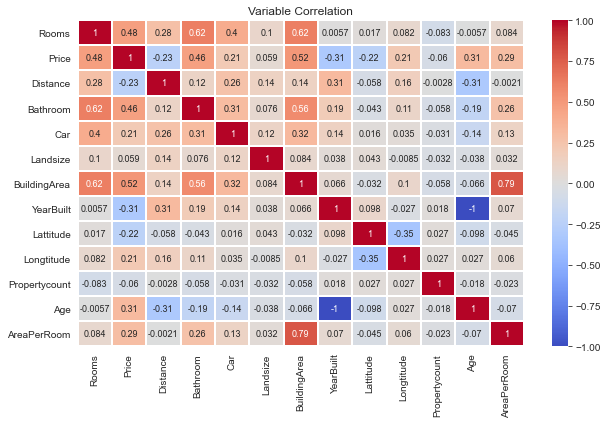

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

### Insights

Rooms, Bathroom, Car, BuildingArea: Moderate to Strong Positive Correlation with Price

Distance: Moderate Negative Correlation with Price

## 7. Identify features and labels and build the model

### Feature Selection

The label/dependent variable that we are trying to predict with our model will be the price variable. 
This is because our target goal is to build a machine learning model that can accurately predict house prices.

In addition, thanks to our data exploration done above, we've determined and selected the features that affect our label(Price):

Type(of house), Rooms, SellerG, Distance(from CBD), Bathroom, Car, LandSize, BuildingArea, Age, Historic, Location, RegionName

### Selection of Machine Learning Model
For this project, we've selected the Random Forest Model as the model of choice. Which is a tree-based algorithm that uses multiple decision-trees to make decisions and predictions.

It is a robust, accurate model that can handle large varieties of input data with binary, categorical, continuous features, which is what is present in our dataset.

It can handle the many different categorical features that we have in our dataset.

In addition, it can handle the high dimensional spaces of housing prices that may go into the millions of dollars as well as the large volume of training samples present in our dataset.

We've also chosen to demonstrate the most basic of machine learning models, the linear regression model, to show the improvement in our model over the baseline.

### Linear Regression Model

In [37]:
#Remove unneccessary Features from the dataset
df.drop(columns=['Suburb','Method', 'Postcode', 
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 
       'Propertycount','AreaPerRoom','StreetName'], inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 2 to 34856
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rooms         8807 non-null   int64         
 1   Type          8807 non-null   category      
 2   Price         8807 non-null   float64       
 3   SellerG       8807 non-null   category      
 4   Date          8807 non-null   datetime64[ns]
 5   Distance      8807 non-null   float64       
 6   Bathroom      8807 non-null   float64       
 7   Car           8807 non-null   float64       
 8   Landsize      8807 non-null   float64       
 9   BuildingArea  8807 non-null   float64       
 10  Regionname    8807 non-null   category      
 11  Age           8807 non-null   float64       
 12  Historic      8807 non-null   category      
 13  Location      8807 non-null   category      
dtypes: category(5), datetime64[ns](1), float64(7), int64(1)
memory usage: 1.4 MB


In [39]:
df['Type'] = df['Type'].map({'u':0,'t':1,'h':2}).astype('int')

In [40]:
df = pd.get_dummies(df, columns=['Regionname','Historic'])

In [41]:
# Dataset splitting

#feature scaling
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() 

X1 = df.drop(['Price','SellerG', 'Date','Location'], axis=1)

# Create target variable
y1 = df['Price']

# Train, test, split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = .20, random_state= 0)

In [42]:
# Fit model to training data
lm_regressor = LinearRegression().fit(X1_train,y1_train)

In [43]:
# Predict
# Predicting test set results
y_pred = lm_regressor.predict(X1_test)

### Regression Model: Random Forest

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rooms                  8807 non-null   int64         
 1   Type                   8807 non-null   int32         
 2   Price                  8807 non-null   float64       
 3   SellerG                8807 non-null   category      
 4   Date                   8807 non-null   datetime64[ns]
 5   Distance               8807 non-null   float64       
 6   Bathroom               8807 non-null   float64       
 7   Car                    8807 non-null   float64       
 8   Landsize               8807 non-null   float64       
 9   BuildingArea           8807 non-null   float64       
 10  Age                    8807 non-null   float64       
 11  Location               8807 non-null   category      
 12  Regionname_E Metro     8807 non-null   uint8         
 13  Re

In [45]:
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'. 
df['SellerG']= label_encoder.fit_transform(df['SellerG']) 
df['Location']= label_encoder.fit_transform(df['Location']) 

In [46]:
X2 = df.drop(['Price','Date'], axis=1)


# Create target variable
y2 = df['Price']

# Train, test, split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = .20, random_state= 0)

#turn the dates into categorical variables using sklearn's OneHotEncoder. What it does is create a new variable for each distinct date.

In [47]:
# create regressor object 
rf_regressor = RandomForestRegressor(bootstrap=True, random_state=0, n_jobs=2) 

In [48]:
# fit the regressor with x and y data 
rf_regressor.fit(X2_train,y2_train)

RandomForestRegressor(n_jobs=2, random_state=0)

<Figure size 1800x1440 with 0 Axes>

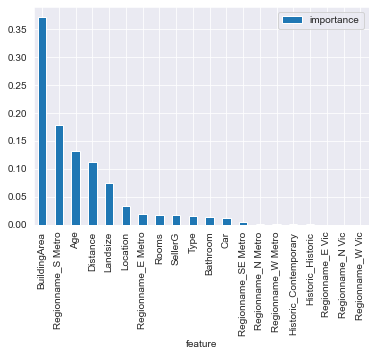

In [49]:
#feature importance
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':X2_train.columns, 'importance': np.round(rf_regressor.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()

In [50]:
final = ['BuildingArea','Regionname_S Metro','Age','Distance',
         'Landsize','Location','Regionname_E Metro','Rooms', 
         'SellerG', 'Bathroom','Type','Car']

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

grid = GridSearchCV(rf_regressor, param_grid, cv=10,
                    scoring='neg_mean_squared_error')
grid.fit(X2_train,y2_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=2, random_state=0),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='neg_mean_squared_error')

In [52]:
#Set the model paramters after tunning.
rf_regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=2,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False) 

In [53]:
# fit the regressor with x and y data 
rf_regressor.fit(X2_train,y2_train)

RandomForestRegressor(n_jobs=2, random_state=0)

In [54]:
y2_pred = rf_regressor.predict(X2_test)  # test the output by changing values

## III. Conclusion

### 9. Evaluation of Machine Learning Models

In [55]:
from sklearn import metrics
#Calculate RMSE
print('Mean Absolute Error (Linear Regression):',metrics.mean_absolute_error(y1_test,y_pred))
print('Mean Squared Error (Linear Regression):',metrics.mean_squared_error(y1_test,y_pred))
print('Root Mean Squared Error (Linear Regression):',np.sqrt(metrics.mean_squared_error(y1_test,y_pred)))

Mean Absolute Error (Linear Regression): 264529.7381985635
Mean Squared Error (Linear Regression): 190109020797.92133
Root Mean Squared Error (Linear Regression): 436014.9318520196


In [56]:
print('Mean Absolute Error (Random Forest):', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error (Random Forest):', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error (Random Forest):', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error (Random Forest): 177519.9795635371
Mean Squared Error (Random Forest): 122360364528.11223
Root Mean Squared Error (Random Forest): 349800.4638763537


In [57]:
# Calculate R Squared Score
print('R^2 Score (Linear Regression) =',metrics.explained_variance_score(y1_test,y_pred))
print('R^2 Score (Random Forest) =',metrics.explained_variance_score(y2_test,y2_pred))

R^2 Score (Linear Regression) = 0.6183258164734153
R^2 Score (Random Forest) = 0.7544255896770056


From the results, we can see that the Random Forest Regression Model displays a marked improvement over the baseline linear Regression Model.

### 10. Reflective Evaluation

From the results, we can indeed prove that a machine learning regression model can indeed be used to accurately forecast housing prices by establishing the relationships between our output label, Price, and the input features. 

This project thereby contributes to the idea that in the future, software programs built using machine learning algorithms for prediction, can be created and used by the stakeholders in the real-estate industry in order to more accurately gauge estate prices and thereby streamline the process in addition.

### Alternative Models

Other alternatives approaches to this house price prediction project, would be to use the different supervised learning regression models, such as Naive-Bayes and or Support Vector Machines. 

The choice of which model to use depends on context, such as the number of features in the dataset, the size of the dataset, how far do we want to scale the model, how accurate we want the model to be, how fast do we want the results to be produced.

SVM vs Random Forest:

SVM is generally more accurately than the decision-tree based model of Random Forest overall.

However, drawbacks of SVM over Random Forest include: Random Forest supports multiclass classification,whereas SVM needs multiple models for the same result and Random Forest deals categorical data better than SVM

Therefore, i'd say in the context of this housing price-prediction model, i'd say that Random Forest is better suited than SVM for our purposes.